In [60]:
import rebound
import numpy as np
import dill
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('../generate_training_data')
from training_data_functions import ressummaryfeaturesxgb
import pandas as pd
from rebound.interruptible_pool import InterruptiblePool

try:
    plt.style.use('paper')
except:
    pass

modelspath = '/mnt/ssd/workspace/stability/MLstability/models/'
model, features, featurefolder = dill.load(open(modelspath+'ressummaryfeaturesxgb_resonantNoFilter.pkl', "rb"))

In [67]:
def run(args):
    Pratio = args[0]
    e = args[1]
    model = args[2]
    sim = rebound.Simulation()
    sim.add(m=1.)
    sim.add(m=1.e-5, P=1., e=0.)
    sim.add(m=1.e-5, P=Pratio, e=e)
    sim.add(m=1.e-5, P=Pratio**2., e=0.)
    ps = sim.particles
    sim.move_to_com()
    sim.collision = "line"
    sim.integrator="whfast"
    sim.dt = 0.037*ps[1].P

    RH = ps[1].a*(ps[1].m/3./ps[0].m)**(1./3.)
    for p in ps:
        p.r = RH

    res = ressummaryfeaturesxgb(sim, (1.e4, 1000))
    megno = res['megno']
    return np.array([megno, res])

In [68]:
%%time
Ngrid = 30
Pratios = np.linspace(1.15,1.3,Ngrid)
es = np.linspace(0.,0.1,Ngrid)
parameters = []
for e in es:
    for Pratio in Pratios:
        parameters.append((Pratio,e,model))
pool = InterruptiblePool()
results = pool.map(run,parameters)

../generate_training_data/training_data_functions.py:313: RankWarning: Polyfit may be poorly conditioned
  p = np.poly1d(np.polyfit(times, EM, 3))
../generate_training_data/training_data_functions.py:329: RankWarning: Polyfit may be poorly conditioned
  p = np.poly1d(np.polyfit(times[len(var)//2:], var[len(var)//2:], 1)) # fit only second half to get rid of transient
../generate_training_data/training_data_functions.py:339: RankWarning: Polyfit may be poorly conditioned
  p = np.poly1d(np.polyfit(times, Z, 3))
../generate_training_data/training_data_functions.py:348: RankWarning: Polyfit may be poorly conditioned
  p = np.poly1d(np.polyfit(times[len(var)//2:], var[len(var)//2:], 1)) # fit only second half to get rid of transient
../generate_training_data/training_data_functions.py:313: RankWarning: Polyfit may be poorly conditioned
  p = np.poly1d(np.polyfit(times, EM, 3))
../generate_training_data/training_data_functions.py:329: RankWarning: Polyfit may be poorly conditioned
  p = np.

../generate_training_data/training_data_functions.py:339: RankWarning: Polyfit may be poorly conditioned
  p = np.poly1d(np.polyfit(times, Z, 3))
../generate_training_data/training_data_functions.py:348: RankWarning: Polyfit may be poorly conditioned
  p = np.poly1d(np.polyfit(times[len(var)//2:], var[len(var)//2:], 1)) # fit only second half to get rid of transient
../generate_training_data/training_data_functions.py:313: RankWarning: Polyfit may be poorly conditioned
  p = np.poly1d(np.polyfit(times, EM, 3))
../generate_training_data/training_data_functions.py:329: RankWarning: Polyfit may be poorly conditioned
  p = np.poly1d(np.polyfit(times[len(var)//2:], var[len(var)//2:], 1)) # fit only second half to get rid of transient
../generate_training_data/training_data_functions.py:339: RankWarning: Polyfit may be poorly conditioned
  p = np.poly1d(np.polyfit(times, Z, 3))
../generate_training_data/training_data_functions.py:348: RankWarning: Polyfit may be poorly conditioned
  p = np.p

../generate_training_data/training_data_functions.py:339: RankWarning: Polyfit may be poorly conditioned
  p = np.poly1d(np.polyfit(times, Z, 3))
../generate_training_data/training_data_functions.py:339: RankWarning: Polyfit may be poorly conditioned
  p = np.poly1d(np.polyfit(times, Z, 3))
../generate_training_data/training_data_functions.py:348: RankWarning: Polyfit may be poorly conditioned
  p = np.poly1d(np.polyfit(times[len(var)//2:], var[len(var)//2:], 1)) # fit only second half to get rid of transient
../generate_training_data/training_data_functions.py:313: RankWarning: Polyfit may be poorly conditioned
  p = np.poly1d(np.polyfit(times, EM, 3))
../generate_training_data/training_data_functions.py:329: RankWarning: Polyfit may be poorly conditioned
  p = np.poly1d(np.polyfit(times[len(var)//2:], var[len(var)//2:], 1)) # fit only second half to get rid of transient
../generate_training_data/training_data_functions.py:339: RankWarning: Polyfit may be poorly conditioned
  p = np.p

../generate_training_data/training_data_functions.py:313: RankWarning: Polyfit may be poorly conditioned
  p = np.poly1d(np.polyfit(times, EM, 3))
../generate_training_data/training_data_functions.py:339: RankWarning: Polyfit may be poorly conditioned
  p = np.poly1d(np.polyfit(times, Z, 3))
../generate_training_data/training_data_functions.py:313: RankWarning: Polyfit may be poorly conditioned
  p = np.poly1d(np.polyfit(times, EM, 3))
../generate_training_data/training_data_functions.py:329: RankWarning: Polyfit may be poorly conditioned
  p = np.poly1d(np.polyfit(times[len(var)//2:], var[len(var)//2:], 1)) # fit only second half to get rid of transient
../generate_training_data/training_data_functions.py:339: RankWarning: Polyfit may be poorly conditioned
  p = np.poly1d(np.polyfit(times, Z, 3))
../generate_training_data/training_data_functions.py:348: RankWarning: Polyfit may be poorly conditioned
  p = np.poly1d(np.polyfit(times[len(var)//2:], var[len(var)//2:], 1)) # fit only seco

CPU times: user 4.85 s, sys: 14.5 s, total: 19.4 s
Wall time: 6min 49s


In [69]:
megnos = np.array([r[0] for r in results])
df = pd.DataFrame([r[1] for r in results])
preds = model.predict_proba(df)[:,1]

/home/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.


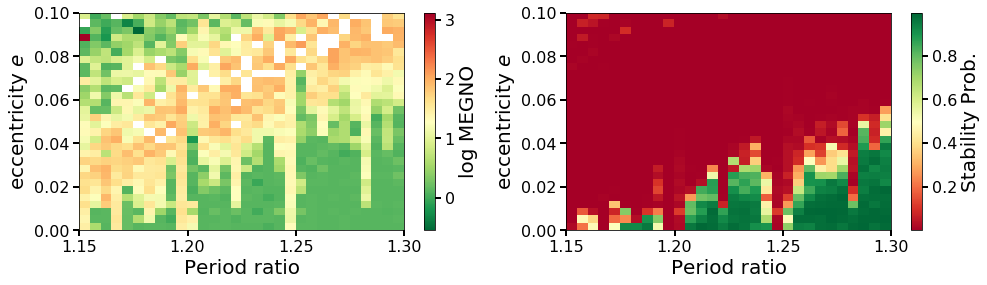

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axarr = plt.subplots(figsize=(16,4), ncols=2)
megno2d = megnos.reshape(Ngrid,Ngrid)
extent = [min(Pratios),max(Pratios),min(es),max(es)]
axarr[0].set_xlim(extent[0],extent[1])
axarr[0].set_xlabel("Period ratio")
axarr[0].set_ylim(extent[2],extent[3])
axarr[0].set_ylabel("eccentricity $e$")
im = axarr[0].imshow(np.log10(megno2d), interpolation="none", cmap="RdYlGn_r", origin="lower", aspect='auto', extent=extent)
cb = plt.colorbar(im, ax=axarr[0])
cb.set_label("log MEGNO")

model2d = preds.reshape(Ngrid,Ngrid)
extent = [min(Pratios),max(Pratios),min(es),max(es)]
axarr[1].set_xlim(extent[0],extent[1])
axarr[1].set_xlabel("Period ratio")
axarr[1].set_ylim(extent[2],extent[3])
axarr[1].set_ylabel("eccentricity $e$")
im = axarr[1].imshow(model2d, interpolation="none", cmap="RdYlGn", origin="lower", aspect='auto', extent=extent)
cb = plt.colorbar(im, ax=axarr[1])
cb.set_label("Stability Prob.")